In [1]:
%matplotlib inline
import os, sys
import numpy as np

import matplotlib.pyplot as plt
import MDAnalysis as mda
import pandas as pd

In [2]:
from NACHRA7_annotations import *

In [3]:
from manuscript import *

<Figure size 432x288 with 0 Axes>

In [4]:
sns.set(style="ticks",context='paper',font_scale=2.5)

In [5]:
#  Radius of each static structures were generated with chap (https://www.channotation.org/)

pore_radius_data = pd.read_pickle('data/radius_structure.pickle')

In [6]:
pore_radius_data

,protein,s,radius,selection,pl_hydrophobicity,pf_hydrophobicity
0,a7_EPI_PNU,-9.499874,2.000000,protein,-0.106014,0.0
1,a7_EPI_PNU,-9.482156,2.002115,protein,-0.109845,0.0
2,a7_EPI_PNU,-9.464437,2.002627,protein,-0.113788,0.0
3,a7_EPI_PNU,-9.446719,2.001361,protein,-0.117845,0.0
4,a7_EPI_PNU,-9.429001,1.998142,protein,-0.122017,0.0
...,...,...,...,...,...,...
5995,a7_BGT,8.835445,1.971187,ca,0.031544,0.0
5996,a7_BGT,8.853775,1.980657,ca,0.031544,0.0
5997,a7_BGT,8.872103,1.988510,ca,0.031544,0.0
5998,a7_BGT,8.890432,1.994905,ca,0.031544,0.0


In [7]:
palette=['#656855','#C78E52','#3F5C76','#3F5C76','#3F5C76']
labels=['Closed','Desensitized','Open','Open M253L','Open A225D','Open M253LA225D']

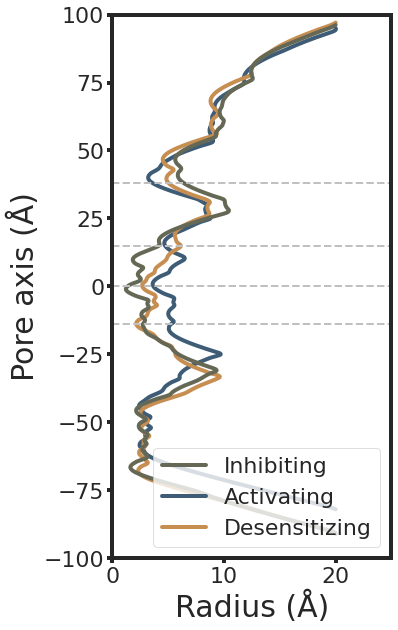

In [9]:
fig, ax = plt.subplots(figsize=(5,10))
lines = []
for (protein, radius), color, label in zip(pore_radius_data[pore_radius_data.selection=='protein'].groupby(['protein'],sort=False), ['#3F5C76','#C78E52' ,'#656855'], ['Activated','Desensitized','Resting']):
    lines.append(ax.plot(radius['radius'] * 10,
            -radius['s'] * 10,
            linewidth=4,
            c=color,
            label=label
            ))
#for ind, domain in enumerate(domain_annotations_plot.items()):
#    ax.axhspan(domain[1][0], domain[1][-1], facecolor='#000000', alpha=0.1)

for ind, residue in enumerate(residue_annotations_plot.items()):
    ax.axhline(residue[1], c='#c0c0c0', linewidth=2, linestyle='--',alpha=1)

ax.set_xlabel('Radius (Å)',fontsize=30)
ax.set_ylabel('Pore axis (Å)',fontsize=30)
ax.set_ylim(-100,100)
ax.set_xlim(0,25)
set_axis_boarder(ax)
ax.legend([lines[2][0], lines[0][0], lines[1][0]], ['Inhibiting', 'Activating','Desensitizing'], loc=4)

plt.savefig('Figures/radius_prot.pdf',bbox_inches = 'tight', pad_inches=0.1, transparent=False)